### Animation using Luxor

In [1]:
using Luxor
mymovie = Movie(400, 400, "mymovie")

Movie(400.0, 400.0, "mymovie", 1:250)

In [2]:
function frame(scene::Scene, framenumber::Int64)
    background("white")
    norm_framenumber = rescale(framenumber,
        scene.framerange.start,
        scene.framerange.stop,
        0, 1)
    rotate(norm_framenumber * 2π)
    juliacircles(100)
end

frame (generic function with 1 method)

┌ Info: Frames for animation "mymovie" are being stored in directory: 
│ 	 C:\Users\STEFA\AppData\Local\Temp\jl_0g2NcA
└ @ Luxor C:\Users\STEFA\.julia\packages\Luxor\kDdL3\src\animate.jl:195
┌ Warning: Movie framerange is longer than scene frame range: 
│ 	 1:250 > 60
└ @ Luxor C:\Users\STEFA\.julia\packages\Luxor\kDdL3\src\animate.jl:203
┌ Info: ... 60 frames saved in directory:
│ 	 C:\Users\STEFA\AppData\Local\Temp\jl_0g2NcA
└ @ Luxor C:\Users\STEFA\.julia\packages\Luxor\kDdL3\src\animate.jl:217
┌ Info: GIF is: juliaspinner.gif
└ @ Luxor C:\Users\STEFA\.julia\packages\Luxor\kDdL3\src\animate.jl:243


Luxor.AnimatedGif("juliaspinner.gif")
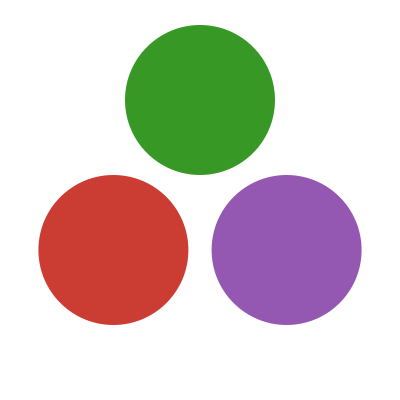

In [3]:
animate(mymovie,
        [
            Scene(mymovie, frame, 1:60)
        ],
    creategif=true,
    pathname="juliaspinner.gif")